# Early Warning System & Anomaly Detection

In [46]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, make_scorer
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# data loading

df = pd.read_excel('FinancialMarketData.xlsx', sheet_name='EWS')
flag = df['Y'].values
df = df.drop(['Data', 'Y'], axis=1)
df = pd.DataFrame(df)
df.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,283.25,0.077,1388,157.26,100.56,105.86,1.6460,25.77,22.50,6.671,...,116.4635,230.5267,123.7616,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,287.65,0.043,1405,165.01,101.86,105.47,1.6383,28.85,21.50,6.747,...,117.2674,231.3770,123.7616,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,287.15,0.135,1368,167.24,102.41,106.04,1.6496,28.28,23.02,6.634,...,117.9946,232.3895,123.7616,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,282.75,0.191,1311,166.85,104.92,107.85,1.6106,28.22,23.45,6.423,...,120.5100,231.9417,122.3281,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,298.40,0.312,1277,165.43,104.22,109.30,1.6108,28.02,21.25,6.231,...,118.7914,237.8117,122.3281,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


## Data exploration and preprocessing
1. Explorative analysis
2. Data visualization
3. Variables normalization

In [3]:
# descriptive statistics

df.describe()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,987.463744,0.036153,2259.860486,245.247649,90.934982,106.605734,1.569618,60.708101,19.992169,3.908324,...,232.109928,704.379495,259.052663,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,494.623740,0.349453,2017.811888,68.278081,11.379095,12.840754,0.212340,25.900813,8.642157,1.178592,...,109.917622,309.951768,75.934443,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,256.680000,-0.974000,291.000000,106.292900,71.329000,75.940000,1.172300,10.010000,9.430000,1.162600,...,80.796800,230.526700,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,433.740000,-0.191000,990.000000,184.705650,81.240500,101.565000,1.417900,39.625000,13.640000,2.959550,...,131.025000,434.660700,205.315550,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562200,57.400000,17.980000,4.100400,...,213.205200,714.807100,264.770200,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,1324.825000,0.260500,2685.500000,301.539250,97.404000,116.220000,1.677050,79.640000,23.625000,4.844600,...,342.884600,939.824600,320.753150,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085200,140.970000,75.910000,6.747000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


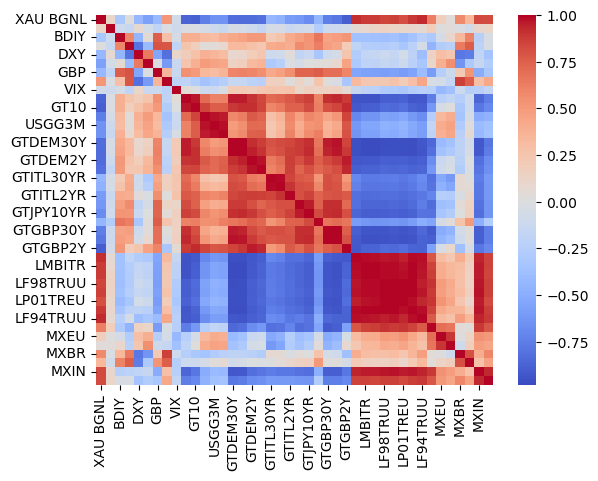

In [4]:
# correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [5]:
# data normalization

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

## Features selection (PCA)

In [6]:
# principal component analysis

pca = PCA(n_components=0.95)
pca.fit(df_normalized)
df_pc = pca.transform(df_normalized)

print("Number of principal components:", pca.n_components_)
print("Explained variance:", pca.explained_variance_ratio_)

Number of principal components: 6
Explained variance: [0.67644534 0.13310893 0.0944113  0.02558578 0.01513424 0.01218573]


## Model selection (outlier detection)
1. Isolation Forest
2. One-Class SVM
3. Local Outlier Factor
4. Gaussian Mixture Model

In [7]:
# isolation forest

isolation_forest = IsolationForest()
isolation_forest.fit(df_pc)
anomaly_predictions = isolation_forest.predict(df_pc)
anomaly_predictions = np.array([1 if p == -1 else 0 for p in anomaly_predictions])

num_anomalies_pred = np.sum(anomaly_predictions == 1)
print("Number of predicted anomalies:", num_anomalies_pred)

Number of predicted anomalies: 304


In [8]:
# model evaluation

precision = precision_score(flag, anomaly_predictions)
recall = recall_score(flag, anomaly_predictions)
f1 = f1_score(flag, anomaly_predictions)
roc_auc = roc_auc_score(flag, anomaly_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.4375
Recall: 0.5611814345991561
F1-score: 0.49168207024029575
ROC AUC: 0.6827646303430563


In [9]:
# one-class svm

one_class_svm = OneClassSVM()
one_class_svm.fit(df_pc)
anomaly_predictions = one_class_svm.predict(df_pc)
anomaly_predictions = np.array([1 if p == -1 else 0 for p in anomaly_predictions])

num_anomalies_pred = np.sum(anomaly_predictions == 1)
print("Number of predicted anomalies:", num_anomalies_pred)

Number of predicted anomalies: 557


In [10]:
# model evaluation

precision = precision_score(flag, anomaly_predictions)
recall = recall_score(flag, anomaly_predictions)
f1 = f1_score(flag, anomaly_predictions)
roc_auc = roc_auc_score(flag, anomaly_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.3267504488330341
Recall: 0.7679324894514767
F1-score: 0.4584382871536523
ROC AUC: 0.6694353522772258


In [11]:
# local outlier factor

lof = LocalOutlierFactor()
lof.fit(df_pc)
anomaly_predictions = lof.fit_predict(df_pc)
anomaly_predictions = np.array([1 if p == -1 else 0 for p in anomaly_predictions])

num_anomalies_pred = np.sum(anomaly_predictions == 1)
print("Number of predicted anomalies:", num_anomalies_pred)

Number of predicted anomalies: 5


In [12]:
# model evaluation

precision = precision_score(flag, anomaly_predictions)
recall = recall_score(flag, anomaly_predictions)
f1 = f1_score(flag, anomaly_predictions)
roc_auc = roc_auc_score(flag, anomaly_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 1.0
Recall: 0.02109704641350211
F1-score: 0.04132231404958678
ROC AUC: 0.510548523206751


In [13]:
# gaussian mixture model

gmm = GaussianMixture(n_components=2)
gmm.fit(df_pc)
probs = gmm.predict_proba(df_pc)
sum_probs = np.sum(probs, axis=1)
threshold = np.percentile(sum_probs, 10)  # anomaly if the sum of probabilities is less than 0.1
anomaly_predictions = (sum_probs < threshold).astype(int)

num_anomalies_pred = np.sum(anomaly_predictions == 1)
print("Number of predicted anomalies:", num_anomalies_pred)

Number of predicted anomalies: 66


In [14]:
# Calcola precision, recall e F1-score
precision = precision_score(flag, anomaly_predictions)
recall = recall_score(flag, anomaly_predictions)
f1 = f1_score(flag, anomaly_predictions)
roc_auc = roc_auc_score(flag, anomaly_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.2727272727272727
Recall: 0.0759493670886076
F1-score: 0.1188118811881188
ROC AUC: 0.5105147293108941


# Model training (isolation forest)

In [38]:
# training of the model

X_train, X_test, y_train, y_test = train_test_split(df_pc, flag, test_size=0.2, random_state=42)
X_train_normal = X_train[y_train == 0]
y_train_normal = y_train[y_train == 0]

isolation_forest = IsolationForest()
isolation_forest.fit(X_train_normal)

IsolationForest()

In [16]:
# test the model

anomaly_predictions = isolation_forest.predict(X_test)
anomaly_predictions = np.array([1 if p == -1 else 0 for p in anomaly_predictions])

num_anomalies_pred = np.sum(anomaly_predictions == 1)
print("Number of predicted anomalies:", num_anomalies_pred)

Number of predicted anomalies: 87


In [17]:
# model evaluation

precision = precision_score(y_test, anomaly_predictions)
recall = recall_score(y_test, anomaly_predictions)
f1 = f1_score(y_test, anomaly_predictions)
roc_auc = roc_auc_score(y_test, anomaly_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.3793103448275862
Recall: 0.717391304347826
F1-score: 0.49624060150375937
ROC AUC: 0.7061532792925571


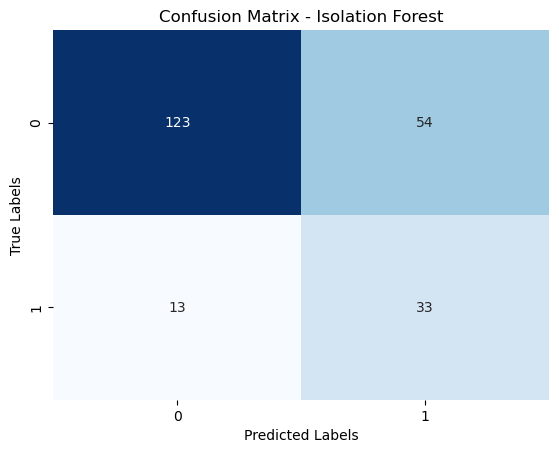

In [23]:
# confusion matrix

conf_matrix_test = confusion_matrix(y_test, anomaly_predictions)

plt.figure()
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Isolation Forest')
plt.show()


## Parameters tuning

In [69]:
# grid search cross validation

param_grid = {
    'n_estimators': [10, 25, 50, 100],
    'max_samples': [0.03, 0.05, 0.07, 0.1],
    'contamination': [0.2133]
}

model = IsolationForest(random_state=42)

scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters: {'contamination': 0.2133, 'max_samples': 0.07, 'n_estimators': 10}
Best Accuracy:  0.144093188598997


Precision: 0.3103448275862069
Recall: 0.391304347826087
F1-score: 0.34615384615384615
ROC AUC: 0.5826578236305576


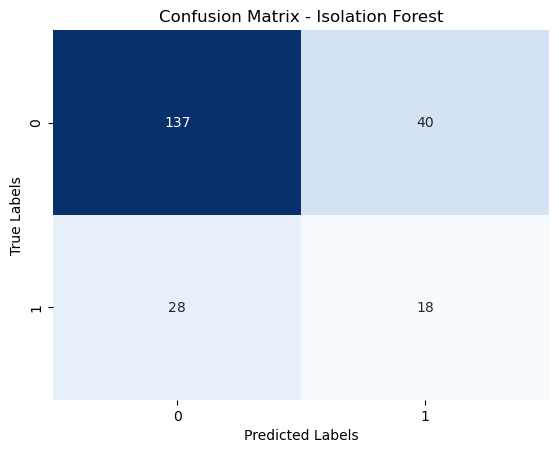

In [63]:
# training of the model

isolation_forest = IsolationForest(n_estimators=10, max_samples=0.07, contamination=0.2133)
isolation_forest.fit(X_train_normal)

# test the model

anomaly_predictions = isolation_forest.predict(X_test)
anomaly_predictions = np.array([1 if p == -1 else 0 for p in anomaly_predictions])

# model evaluation

precision = precision_score(y_test, anomaly_predictions)
recall = recall_score(y_test, anomaly_predictions)
f1 = f1_score(y_test, anomaly_predictions)
roc_auc = roc_auc_score(y_test, anomaly_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# confusion matrix

conf_matrix_test = confusion_matrix(y_test, anomaly_predictions)

plt.figure()
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Isolation Forest')
plt.show()


## Model selection (classification)
1. Logistic regressiom
2. Decision tree
2. Random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Supponiamo che X sia il tuo dataframe contenente le features e y sia la variabile di output binaria
# Assicurati che X contenga solo le features e y sia la variabile target

# Dividi il dataset in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestramento del modello di Regressione Logistica
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Valutazione del modello di Regressione Logistica
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Accuracy of Logistic Regression:", logistic_accuracy)

# Addestramento del modello di Albero Decisionale
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Valutazione del modello di Albero Decisionale
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Accuracy of Decision Tree Classifier:", decision_tree_accuracy)

# Addestramento del modello di Foresta Casuale
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

# Valutazione del modello di Foresta Casuale
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Accuracy of Random Forest Classifier:", random_forest_accuracy)
